## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine = load_wine()
X_train, X_test, Y_train, Y_test = train_test_split(wine.data,wine.target,test_size=0.3)

In [4]:

rfc = RandomForestClassifier(random_state=0)
 
rfc = rfc.fit(X_train,Y_train)

score_r = rfc.score(X_test,Y_test)

print(f"Random Forest:{score_r}")

Random Forest:0.9814814814814815


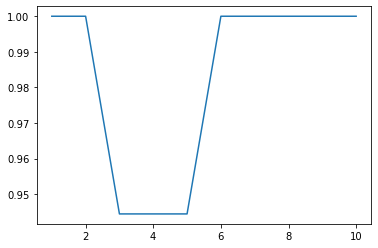

In [6]:
#總共切割十份(cv=10),每次取一份做測試集，剩下九份做訓練集
#交叉驗證來觀察模型穩定性
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s)

plt.show()

In [10]:
from sklearn import metrics
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9814814814814815


In [12]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [13]:
rfc.feature_importances_

array([0.1133019 , 0.05126647, 0.01896581, 0.0104602 , 0.02972745,
       0.07194722, 0.13961242, 0.01255426, 0.03691937, 0.16871965,
       0.05565261, 0.12829971, 0.16257293])

In [17]:
for feature, importance in zip(wine.feature_names, rfc.feature_importances_):
    print(f'feature:{feature}\nimportance:{importance}\n')

feature:alcohol
importance:0.11330190083603968

feature:malic_acid
importance:0.051266466451841554

feature:ash
importance:0.018965810273730847

feature:alcalinity_of_ash
importance:0.010460201776008232

feature:magnesium
importance:0.029727454716844126

feature:total_phenols
importance:0.07194721867747977

feature:flavanoids
importance:0.1396124194465044

feature:nonflavanoid_phenols
importance:0.012554262676519176

feature:proanthocyanins
importance:0.036919369464265474

feature:color_intensity
importance:0.16871964724313043

feature:hue
importance:0.055652613869922304

feature:od280/od315_of_diluted_wines
importance:0.12829970514393368

feature:proline
importance:0.16257292942378043



In [11]:
print(f'在{rfc.apply(X_test).shape[1]}棵樹上，共有{rfc.apply(X_test).shape[0]}個index')

在25棵樹上，共有54個index
